# Support Vector Machines

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
from sklearn.model_selection import GridSearchCV
import numpy as np
import time

### Data Preparation

In [2]:
df = pd.read_csv('Data/voice.csv')

x = df.iloc[:,:-1]
y = df.label

### Methodology

In [3]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
param_grid = {
    'C': np.logspace(-4, 4, 5),
    'gamma': [1, 0.1, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.505 total time=   0.2s
[CV 2/5] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 3/5] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 4/5] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.507 total time=   0.2s
[CV 5/5] END .....C=0.0001, gamma=1, kernel=rbf;, score=0.506 total time=   0.2s
[CV 1/5] END ..C=0.0001, gamma=1, kernel=linear;, score=0.635 total time=   0.0s
[CV 2/5] END ..C=0.0001, gamma=1, kernel=linear;, score=0.651 total time=   0.1s
[CV 3/5] END ..C=0.0001, gamma=1, kernel=linear;, score=0.606 total time=   0.1s
[CV 4/5] END ..C=0.0001, gamma=1, kernel=linear;, score=0.629 total time=   0.1s
[CV 5/5] END ..C=0.0001, gamma=1, kernel=linear;, score=0.656 total time=   0.1s
[CV 1/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.505 total time=   0.2s
[CV 2/5] END ...C=0.0001, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [7]:
print(f'Params: {grid.best_params_}')

Params: {'C': 100.0, 'gamma': 1, 'kernel': 'linear'}


In [4]:
start_timer = time.perf_counter()
SVMmodel = SVC(kernel = 'linear', gamma=1, C=100)
SVMmodel.fit(x_train,y_train)
pickle.dump(SVMmodel, open("Models/SVM.pickle", "wb"))
end_timer = time.perf_counter()
print(f"Logistic Regression time to train: {end_timer - start_timer:0.4f} seconds")
y_pred = SVMmodel.predict(x_test)

Logistic Regression time to train: 17.2326 seconds


### Evaluation

#### Accuracy

In [5]:
print("SVM Accuracy score: ",accuracy_score(y_pred,y_test)*100,"%")

SVM Accuracy score:  97.47634069400631 %


#### Confusion Matrix

In [12]:
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

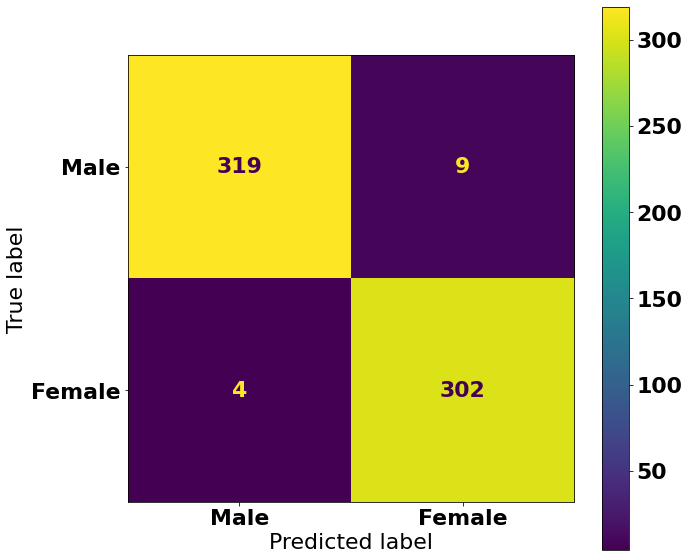

In [14]:
c = confusion_matrix(y_test, y_pred)
cp = ConfusionMatrixDisplay(c, display_labels=["Male", "Female"])
fig, ax = plt.subplots(figsize=(10,10))
cp.plot(ax = ax)

#### Classification Report

In [6]:
print("\t\t\tSVM report:\n", classification_report(y_pred,y_test, digits=3))

			SVM report:
               precision    recall  f1-score   support

      female      0.963     0.983     0.973       292
        male      0.985     0.968     0.976       342

    accuracy                          0.975       634
   macro avg      0.974     0.975     0.975       634
weighted avg      0.975     0.975     0.975       634



#### Feature Importance

In [17]:
importances = abs(SVMmodel.coef_[0])
importances_total = sum(importances)
for i in range(len(importances)):
    importances[i] = (importances[i]/10000)*importances_total
importances_df = pd.DataFrame({'Feature_names':x_train.columns, 'Importance':importances})
importances_df = importances_df.sort_values(by=['Importance'], ascending=False)

Text(0, 0.5, 'Importance')

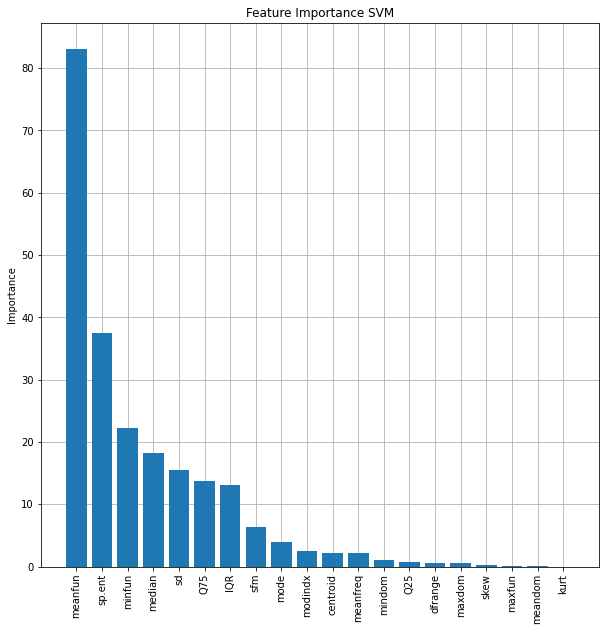

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(zorder=0)
ax.bar(importances_df['Feature_names'], importances_df['Importance'], zorder=3)
plt.xticks(rotation = 90) 
ax.set_title("Feature Importance SVM")
ax.set_ylabel("Importance")